In [1]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('paper', font_scale=1.3)
import pandas as pd
import warnings
import sys

warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Experiment

In [2]:
from placecell_COM_change import GetData

In [3]:
DataFolder = '/home/sheffieldlab/Desktop/NoReward/ImagingData/Good_behavior/Dataused/'
CombinedDataFolder = '/home/sheffieldlab/Desktop/NoReward/ImagingData/Good_behavior/Dataused/PlaceCellResults_All/'
Lick_folder = '/home/sheffieldlab/Desktop/NoReward/ImagingData/Good_behavior/Dataused/LickData/'
SaveFiguresFolder ='/home/sheffieldlab/Desktop/NoReward/PaperFigures/Figure3/'

In [4]:
gd_exp = GetData(DataFolder, CombinedDataFolder, Lick_folder)

## Control

In [5]:
DataFolder = '/home/sheffieldlab/Desktop/NoReward/ControlData/Dataused/'
CombinedDataFolder = '/home/sheffieldlab/Desktop/NoReward/ControlData//Dataused/PlaceCellResults_All/'

In [6]:
gd_cntrl = GetData(DataFolder, CombinedDataFolder, Lick_folder)

## Corr with lap sorted

In [7]:
com_exp, corr_exp = gd_exp.get_correlation_withtask(taskstoplot=['Task2', 'Task1', 'Task3'])
com_cntrl, corr_cntrl = gd_cntrl.get_correlation_withtask(taskstoplot=['Task1a', 'Task1b'], basetask='Task1a', controlflag=1)

CFC17 Task2 Laps: 36
CFC17 Task1 Laps: 36
NR14 Task2 Laps: 23
NR14 Task1 Laps: 30
NR14 Task3 Laps: 20
NR15 Task2 Laps: 33
NR15 Task1 Laps: 34
CFC4 Task2 Laps: 61
CFC4 Task1 Laps: 39
CFC4 Task3 Laps: 37
NR6 Task2 Laps: 31
NR6 Task1 Laps: 43
NR6 Task3 Laps: 25
NR21 Task2 Laps: 32
NR21 Task1 Laps: 40
NR21 Task3 Laps: 22
NR31 Task1a Laps: 28
NR31 Task1b Laps: 30
CFC17 Task1a Laps: 34
CFC17 Task1b Laps: 28
CFC3 Task1a Laps: 49
CFC3 Task1b Laps: 49
CFC4 Task1a Laps: 46
CFC4 Task1b Laps: 45
CFC19 Task1a Laps: 36
CFC19 Task1b Laps: 37
NR34 Task1a Laps: 27
NR34 Task1b Laps: 24


In [8]:
from placecell_COM_change import PlotFigures as plf
plf = plf()

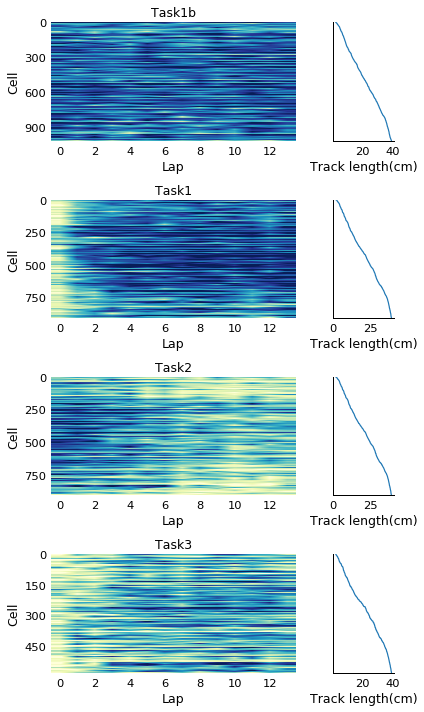

In [15]:
fig, ax = plt.subplots(4, 2, figsize=(6, 10), gridspec_kw={
                       'width_ratios': [4, 1]}, sharey='row')
plf.plot_correlation_with_com(ax[0], com_cntrl, corr_cntrl, 'Task1b')
plf.plot_correlation_with_com(ax[1], com_exp, corr_exp, 'Task1')
plf.plot_correlation_with_com(ax[2], com_exp, corr_exp, 'Task2')
plf.plot_correlation_with_com(ax[3], com_exp, corr_exp, 'Task3')

for a in ax[:, 0]:
    sns.despine(right=True, top=True, left=True, bottom=True, ax=a)
    a.tick_params(axis='both', pad=5, length=0)
fig.tight_layout()

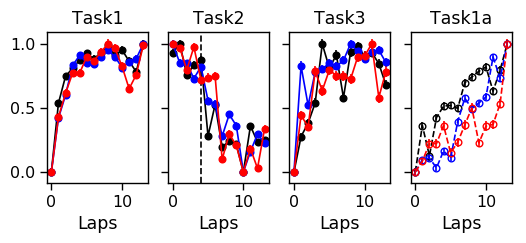

In [16]:
fig, ax = plt.subplots(1, 4, dpi=100, sharey='all', sharex='all')
plf.get_correlation_withlap(ax[0], com_exp, corr_exp, 'Task1')
plf.get_correlation_withlap(ax[1], com_exp, corr_exp, 'Task2')
plf.get_correlation_withlap(ax[2], com_exp, corr_exp, 'Task3')

plf.get_correlation_withlap(ax[3], com_cntrl, corr_cntrl, 'Task1a', controlflag=1)
fig.set_size_inches((6, 2))

## With sliding window

In [11]:
com_exp_sw, corr_exp_sw = gd_exp.get_correlation_withslidingwindow(taskstoplot=['Task1', 'Task2', 'Task3'], totallaps=20, slidingwindow=4)
com_cntrl_sw, corr_cntrl_sw = gd_cntrl.get_correlation_withslidingwindow(taskstoplot=['Task1a', 'Task1b'], totallaps=20, slidingwindow=5, basetask='Task1b', controlflag=1)

CFC17
CFC17 Task1 Laps: 36
CFC17 Task1 0.18559943198122497
CFC17 Task2 Laps: 36
CFC17 Task2 0.5064774687530879
NR14
NR14 Task1 Laps: 30
NR14 Task1 0.10772346652554289
NR14 Task2 Laps: 23
NR14 Task2 0.6030987343939032
NR14 Task3 Laps: 20
NR14 Task3 0.13160445310914096
NR15
NR15 Task1 Laps: 34
NR15 Task1 0.06133757711297199
NR15 Task2 Laps: 33
NR15 Task2 0.6410391663952766
NR23
CFC4
CFC4 Task1 Laps: 39
CFC4 Task1 0.08633006551826211
CFC4 Task2 Laps: 61
CFC4 Task2 0.5629976949056279
CFC4 Task3 Laps: 37
CFC4 Task3 0.012744255615477564
NR32
NR6
NR6 Task1 Laps: 43
NR6 Task1 0.36095697364843815
NR6 Task2 Laps: 31
NR6 Task2 0.5776089660125572
NR6 Task3 Laps: 25
NR6 Task3 0.22808755510639042
CFC19
CFC19 Task1 Laps: 36
CFC19 Task1 0.2959547382346758
CFC19 Task2 Laps: 17
CFC19 Task2 0.668756185000252
NR24
NR24 Task1 Laps: 27
NR24 Task1 0.1610931829506111
NR24 Task2 Laps: 16
NR24 Task2 0.6031328151024234
NR24 Task3 Laps: 22
NR24 Task3 0.4409881302223397
NR21
NR21 Task1 Laps: 40
NR21 Task1 0.389943

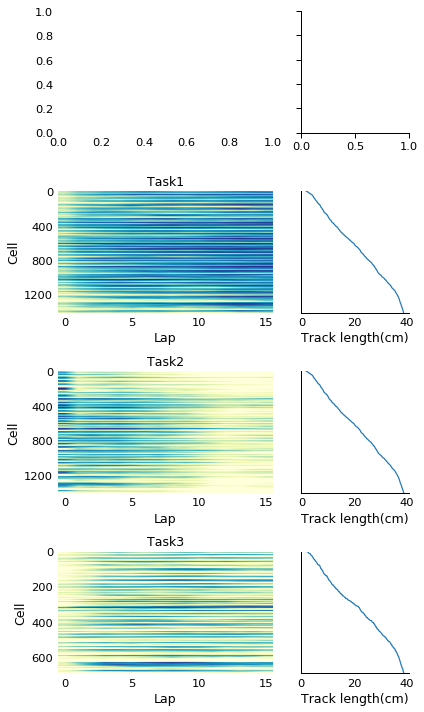

In [12]:
fig, ax = plt.subplots(4, 2, figsize=(6, 10), gridspec_kw={
                       'width_ratios': [4, 2]}, sharey='row')
# plf.plot_correlation_with_com(ax[0], com_cntrl_sw, corr_cntrl_sw, 'Task1b')
plf.plot_correlation_with_com(ax[1], com_exp_sw, corr_exp_sw, 'Task1')
plf.plot_correlation_with_com(ax[2], com_exp_sw, corr_exp_sw, 'Task2')
plf.plot_correlation_with_com(ax[3], com_exp_sw, corr_exp_sw, 'Task3')

for a in ax[:, 0]:
    sns.despine(right=True, top=True, left=True, bottom=True, ax=a)
    a.tick_params(axis='both', pad=5, length=0)
fig.tight_layout()

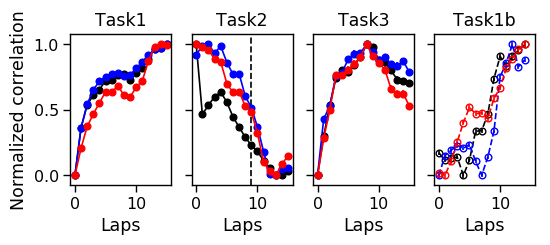

In [13]:
fig, ax = plt.subplots(1, 4, dpi=100, sharey='all', sharex='all')
plf.get_correlation_withlap(ax[0], com_exp_sw, corr_exp_sw, 'Task1')
plf.get_correlation_withlap(ax[1], com_exp_sw, corr_exp_sw, 'Task2', sliding_window=1)
plf.get_correlation_withlap(ax[2], com_exp_sw, corr_exp_sw, 'Task3')

plf.get_correlation_withlap(ax[3], com_cntrl_sw, corr_cntrl_sw, 'Task1b', controlflag=1)
ax[0].set_ylabel('Normalized correlation')
fig.set_size_inches((6, 2))